**Preprocessing**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.feature_selection import SelectKBest, f_regression
import numpy as np
# load dataset
data_path = 'video_game_reviews.csv'
data = pd.read_csv(data_path)

# cek tipe data
print(data.dtypes)

# data preprocessing
# pengecekan Missing Values
print("Pengecekan Missing Values:")
print(data.isnull().sum())
print("Pengecekan Duplikasi:")
print(data.duplicated().sum())



Game Title                  object
User Rating                float64
Age Group Targeted          object
Price                      float64
Platform                    object
Requires Special Device     object
Developer                   object
Publisher                   object
Release Year                 int64
Genre                       object
Multiplayer                 object
Game Length (Hours)        float64
Graphics Quality            object
Soundtrack Quality          object
Story Quality               object
User Review Text            object
Game Mode                   object
Min Number of Players        int64
dtype: object
Pengecekan Missing Values:
Game Title                 0
User Rating                0
Age Group Targeted         0
Price                      0
Platform                   0
Requires Special Device    0
Developer                  0
Publisher                  0
Release Year               0
Genre                      0
Multiplayer                0
Game Lengt

**EDA**


Korelasi dengan Target (User Rating):
Korelasi antara User Rating dan User Rating: 1.00
Korelasi antara Price dan User Rating: 0.76
Korelasi antara Release Year dan User Rating: -0.00
Korelasi antara Game Length (Hours) dan User Rating: 0.63
Korelasi antara Min Number of Players dan User Rating: -0.00


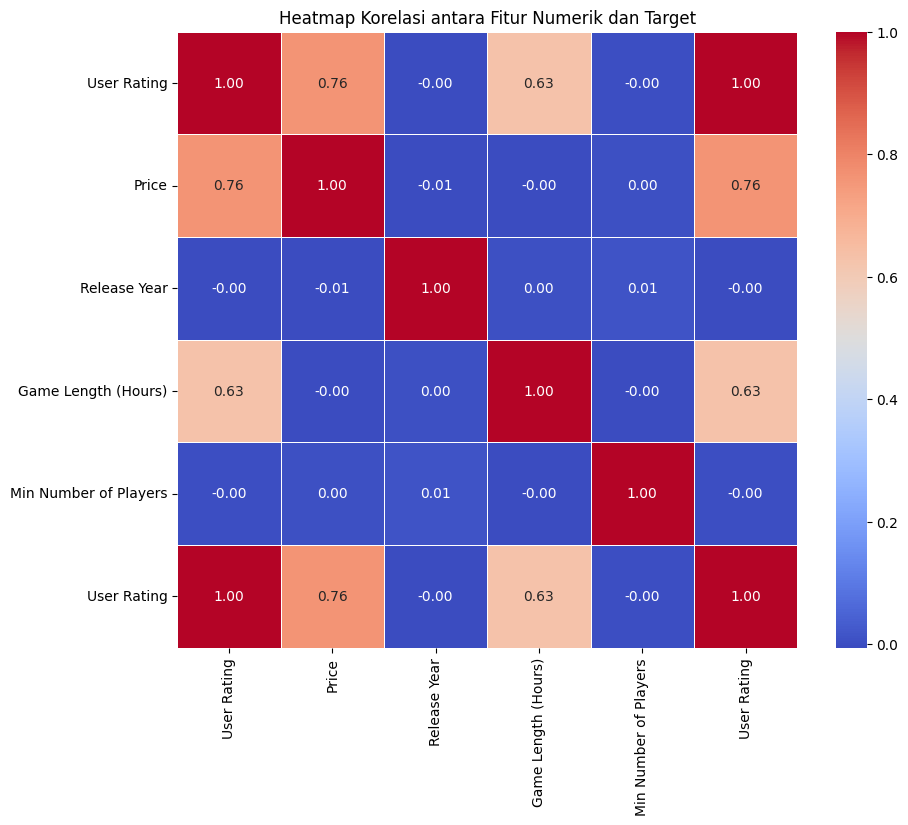


Statistik Deskriptif Semua Fitur Numerik:
        User Rating         Price  Release Year  Game Length (Hours)  \
count  47774.000000  47774.000000  47774.000000         47774.000000   
mean      29.719329     39.951371   2016.480952            32.481672   
std        7.550131     11.520342      4.027276            15.872508   
min       10.100000     19.990000   2010.000000             5.000000   
25%       24.300000     29.990000   2013.000000            18.800000   
50%       29.700000     39.845000   2016.000000            32.500000   
75%       35.100000     49.957500   2020.000000            46.300000   
max       49.500000     59.990000   2023.000000            60.000000   

       Min Number of Players  
count           47774.000000  
mean                5.116758  
std                 2.769521  
min                 1.000000  
25%                 3.000000  
50%                 5.000000  
75%                 7.000000  
max                10.000000  


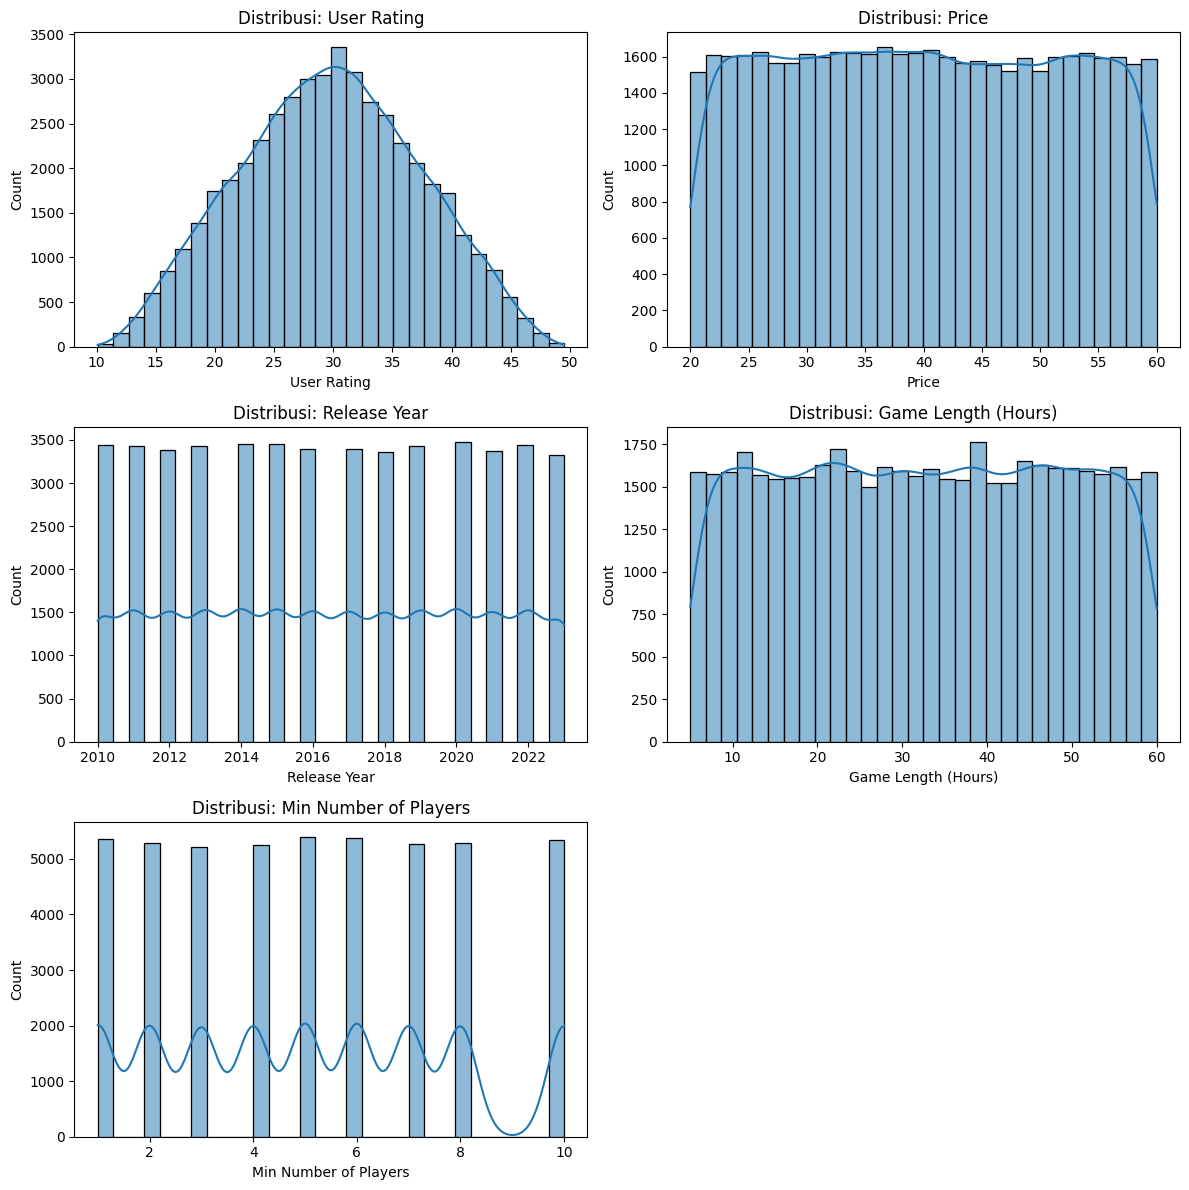


Statistik Deskriptif untuk User Rating:
count    47774.000000
mean        29.719329
std          7.550131
min         10.100000
25%         24.300000
50%         29.700000
75%         35.100000
max         49.500000
Name: User Rating, dtype: float64

Statistik Deskriptif untuk Price:
count    47774.000000
mean        39.951371
std         11.520342
min         19.990000
25%         29.990000
50%         39.845000
75%         49.957500
max         59.990000
Name: Price, dtype: float64

Statistik Deskriptif untuk Release Year:
count    47774.000000
mean      2016.480952
std          4.027276
min       2010.000000
25%       2013.000000
50%       2016.000000
75%       2020.000000
max       2023.000000
Name: Release Year, dtype: float64

Statistik Deskriptif untuk Game Length (Hours):
count    47774.000000
mean        32.481672
std         15.872508
min          5.000000
25%         18.800000
50%         32.500000
75%         46.300000
max         60.000000
Name: Game Length (Hours), dtype

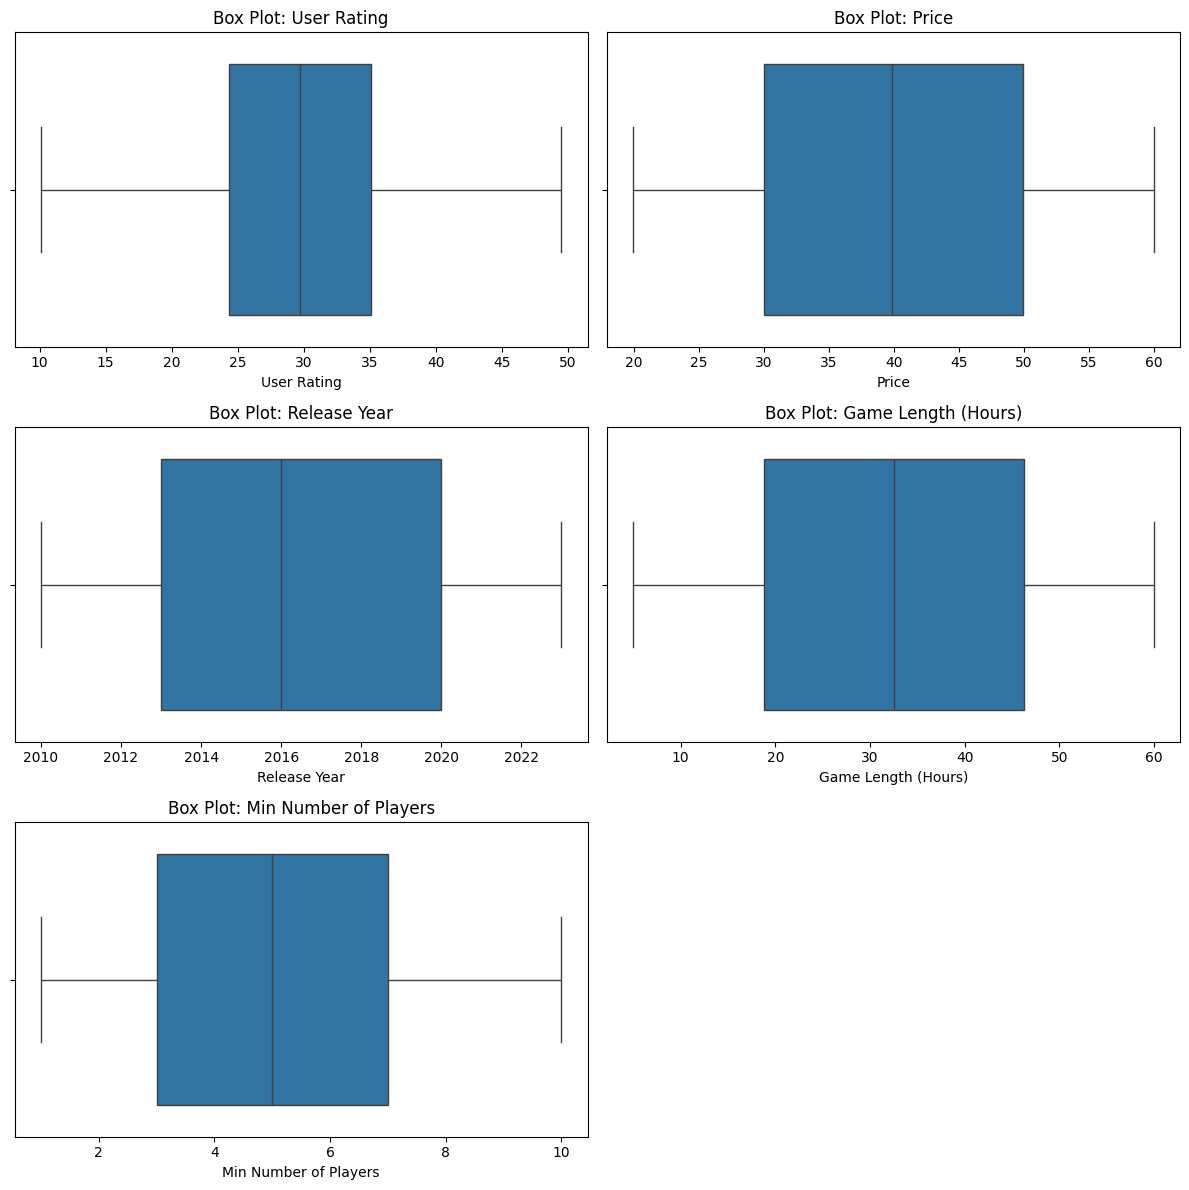


Statistik Deskriptif untuk User Rating:
count    47774.000000
mean        29.719329
std          7.550131
min         10.100000
25%         24.300000
50%         29.700000
75%         35.100000
max         49.500000
Name: User Rating, dtype: float64

Statistik Deskriptif untuk Price:
count    47774.000000
mean        39.951371
std         11.520342
min         19.990000
25%         29.990000
50%         39.845000
75%         49.957500
max         59.990000
Name: Price, dtype: float64

Statistik Deskriptif untuk Release Year:
count    47774.000000
mean      2016.480952
std          4.027276
min       2010.000000
25%       2013.000000
50%       2016.000000
75%       2020.000000
max       2023.000000
Name: Release Year, dtype: float64

Statistik Deskriptif untuk Game Length (Hours):
count    47774.000000
mean        32.481672
std         15.872508
min          5.000000
25%         18.800000
50%         32.500000
75%         46.300000
max         60.000000
Name: Game Length (Hours), dtype

In [ ]:
# pisahkan fitur numerik dan kategorikal
numerical_features = data.select_dtypes(include=[float, int]).columns.tolist()

# definisikan target
target = 'User Rating'

# korelasi antara fitur numerik dan target
correlation_with_target = data[numerical_features].corr()[target]

# print korelasi dengan target dalam bentuk teks
print("\nKorelasi dengan Target (User Rating):")
for feature, correlation in correlation_with_target.items():
    print(f"Korelasi antara {feature} dan {target}: {correlation:.2f}")

# menentukan fitur dengan korelasi lebih besar dari threshold
threshold = 0.1
selected_features = correlation_with_target[correlation_with_target.abs() > threshold].index

# visualisasi Heatmap Korelasi
plt.figure(figsize=(10, 8))
correlation_matrix = data[numerical_features + [target]].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap Korelasi antara Fitur Numerik dan Target')
plt.show()

# output deskriptif untuk semua fitur numerik
print("\nStatistik Deskriptif Semua Fitur Numerik:")
print(data[numerical_features].describe())

# visualisasi Distribusi Fitur (Histogram, KDE, dan Box Plot)
# mengatur jumlah baris dan kolom untuk subplot secara otomatis
n_features = len(numerical_features)
n_cols = 2  # Tentukan jumlah kolom yang diinginkan
n_rows = np.ceil(n_features / n_cols).astype(int)  # Menghitung jumlah baris

plt.figure(figsize=(12, n_rows * 4))  # Sesuaikan tinggi gambar berdasarkan jumlah baris

# menampilkan histogram dan KDE untuk setiap fitur numerik
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(data[feature], kde=True, bins=30)
    plt.title(f'Distribusi: {feature}')

plt.tight_layout()
plt.show()

# output deskriptif untuk setiap fitur numerik setelah visualisasi distribusi
for feature in numerical_features:
    print(f"\nStatistik Deskriptif untuk {feature}:")
    print(data[feature].describe())

# box Plot untuk melihat distribusi numerik
plt.figure(figsize=(12, n_rows * 4))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(x=data[feature])
    plt.title(f'Box Plot: {feature}')

plt.tight_layout()
plt.show()

# output deskriptif untuk setiap fitur numerik setelah visualisasi box plot
for feature in numerical_features:
    print(f"\nStatistik Deskriptif untuk {feature}:")
    print(data[feature].describe())

**Seleksi Fitur**


Top Features yang Terpilih berdasarkan Feature Selection:
['Price', 'Game Length (Hours)']

Feature Importance:
Fitur: Price, Importance: 0.59
Fitur: Game Length (Hours), Importance: 0.41


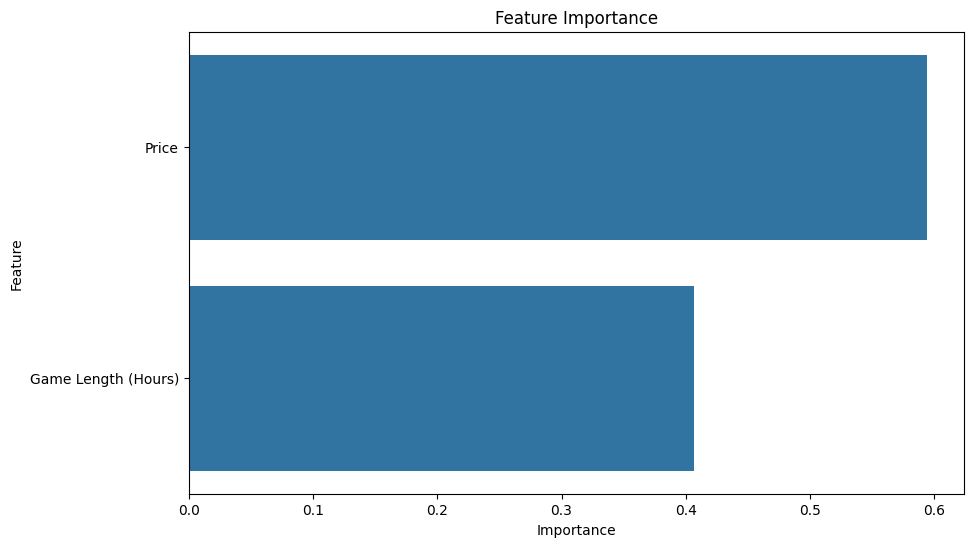

In [ ]:
# feature Selection
# menyusun data untuk feature selection
X = data[selected_features]
y = data[target]

# menggunakan SelectKBest untuk memilih 10 fitur terbaik
selector = SelectKBest(score_func=f_regression, k=min(10, X.shape[1]))  # Pastikan k tidak lebih dari jumlah fitur
X_new = selector.fit_transform(X, y)

selected_features_indices = selector.get_support(indices=True)
selected_features = [X.columns[i] for i in selected_features_indices]

print("\nTop Features yang Terpilih berdasarkan Feature Selection:")
print(selected_features)

# visualisasi feature importance
model = RandomForestRegressor(random_state=42)
model.fit(X[selected_features], y)

importances = model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': selected_features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# print feature importance dalam bentuk teks
print("\nFeature Importance:")
for i in range(feature_importance_df.shape[0]):
    print(f"Fitur: {feature_importance_df['Feature'].iloc[i]}, Importance: {feature_importance_df['Importance'].iloc[i]:.2f}")

# visualisasi feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.show()

**Modeling**


Evaluasi Model:
Mean Squared Error: 1.65
Mean Absolute Error: 1.08
R^2 Score: 0.97


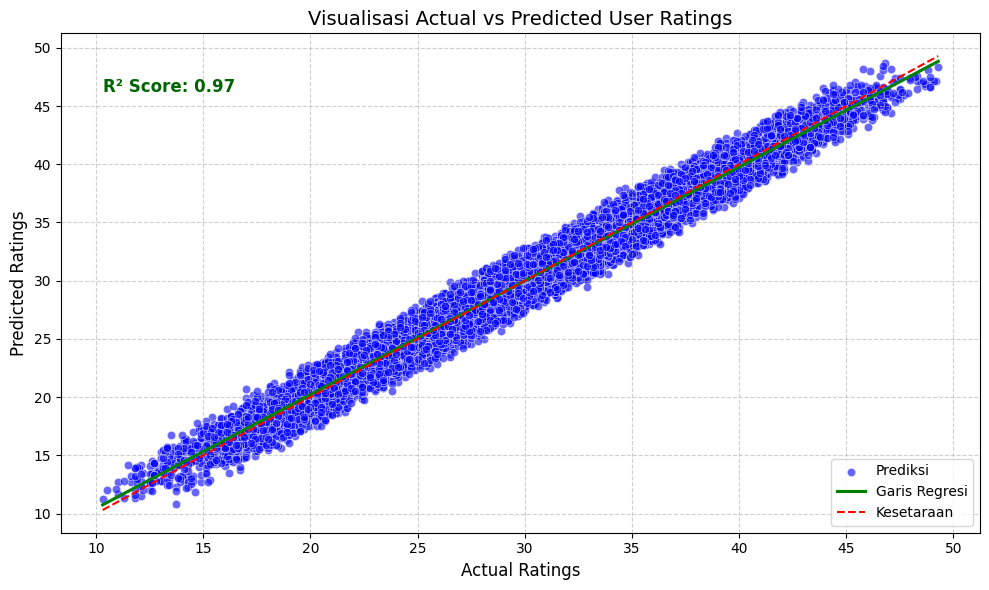

In [ ]:
# modeling
# membagi embagi data menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X[selected_features], y, test_size=0.2, random_state=42)

# melatih model regresi
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nEvaluasi Model:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"R^2 Score: {r2:.2f}")

# visualisasi Prediksi dengan modifikasi
plt.figure(figsize=(10, 6))

# scatter plot antara actual vs predicted
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, color='blue', label='Prediksi')

# garis regresi linier
sns.regplot(x=y_test, y=y_pred, scatter=False, color='green', label='Garis Regresi')

# garis kesetaraan (Actual = Predicted)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Kesetaraan')

# informasi R^2 Score
plt.text(min(y_test), max(y_pred) * 0.95, f"R² Score: {r2:.2f}", fontsize=12, color='darkgreen', weight='bold')

plt.title('Visualisasi Actual vs Predicted User Ratings', fontsize=14)
plt.xlabel('Actual Ratings', fontsize=12)
plt.ylabel('Predicted Ratings', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


**Evaluasi**

In [ ]:
# mencetak hasil evaluasi
print("\nEvaluasi Model:")
print(f"- Mean Squared Error (MSE): {mse:.2f}")
print(f"- Mean Absolute Error (MAE): {mae:.2f}")
print(f"- R² Score: {r2:.2f}")

# analisis hasil
print("\nAnalisis Hasil Evaluasi:")
print(f"1. **Mean Squared Error (MSE)**: {mse:.2f}")
print("   - MSE menunjukkan rata-rata kuadrat error antara nilai aktual dan prediksi.")
print("   - Nilai kecil menunjukkan prediksi model mendekati nilai aktual.")

print(f"2. **Mean Absolute Error (MAE)**: {mae:.2f}")
print("   - MAE mengukur rata-rata error absolut antara nilai aktual dan prediksi.")
print("   - Nilai kecil menunjukkan model lebih akurat dalam memprediksi nilai target.")

print(f"3. **R² Score**: {r2:.2f}")
print("   - R² mengukur seberapa baik model menjelaskan variabilitas data target.")
print("   - Nilai mendekati 1 menunjukkan bahwa model sangat baik dalam menjelaskan hubungan antara fitur dan target.")


Evaluasi Model:
- Mean Squared Error (MSE): 1.65
- Mean Absolute Error (MAE): 1.08
- R² Score: 0.97

Analisis Hasil Evaluasi:
1. **Mean Squared Error (MSE)**: 1.65
   - MSE menunjukkan rata-rata kuadrat error antara nilai aktual dan prediksi.
   - Nilai kecil menunjukkan prediksi model mendekati nilai aktual.
2. **Mean Absolute Error (MAE)**: 1.08
   - MAE mengukur rata-rata error absolut antara nilai aktual dan prediksi.
   - Nilai kecil menunjukkan model lebih akurat dalam memprediksi nilai target.
3. **R² Score**: 0.97
   - R² mengukur seberapa baik model menjelaskan variabilitas data target.
   - Nilai mendekati 1 menunjukkan bahwa model sangat baik dalam menjelaskan hubungan antara fitur dan target.
